# Approach 
    
##### Reason to use Python over R:
    Text handling capabilities in Python are much advance and have low learning curve thus python is chosen as first language to process data. 
    
So in this excercise we will be using Following libraries:
* Numpy
* Python Pandas 
* Python RegEx 
* ScikitLearn
* WordCloud
* NLTK
* TextBlob

In [1]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

#### Data Loading

In [44]:
# importing Libraries 
import numpy as np                    # numerical cumputations
import pandas as pd                   # data processing
import re                             #regular expression
from nltk.corpus import stopwords
eng_stopwords = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
# Loding data
data = pd.read_excel('Unstructured Data English.xlsx', sheetname='krafttweets6938_dataframe',index_col='ID')
data = pd.DataFrame(data.iloc[:,0])  # remove unwanted columns
data.columns = ['text']  # remane column name
data.head()

,text
ID,
1,Huge @Patriots pep rally at Toso's in PHX...wa...
2,For Robert Kraft and Roger Goodell air still i...
3,For Robert Kraft and Roger Goodell air still i...
4,Need #recipes? Visit the Kraft #CookingUpGood ...
5,@EdgeofSports You take the good-You take the b...


## Task 1  

#### Text Processing

In [4]:
# remove words STARTSWITH https
data.text = data.text.apply(lambda x: re.compile(r'https?:\/\/.*\/\w*').sub('', x))

In [5]:
# Lower case words
data['text'] = data['text'].apply(lambda x : x.lower())

In [6]:
# Removed words STARTSWITH tweet handlers @
data['text'] = data['text'].apply(lambda x : re.sub(r'@[A-Za-z0-9]+',r'',x)) 

In [7]:
#Removed words STARTSWITH tweet handlers with underscore @_
data['text'] = data['text'].apply(lambda x : re.sub(r'@_[A-Za-z0-9]+',r'',x)) 

In [8]:
#Remove words STARTSWITH hashtag as thery are not required for sentiment
data['text'] = data['text'].apply(lambda x : re.sub(r'#[A-Za-z0-9]+',r'',x))   

In [9]:
# removed words STARTSWITH &amp;
data['text'] = data['text'].apply(lambda x : re.sub(r'&[A-Za-z0-9]+',r'',x)) 

In [10]:
# remove stopwords
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (eng_stopwords)]))

In [11]:
# Step - 3 Remove special characters sequentially

data['text'] = data['text'].apply(lambda x: re.sub(r"[|‘|’|'|>|<|_|#|£|+|&|]",r'',x))
data['text'] = data['text'].apply(lambda x: re.sub(r'[|^|=|~|…|”|“|"|"|%|/|@|(|)|]',r'',x))
data['text'] = data['text'].apply(lambda x : re.sub("[\(\[].*?[\)\]]", "", x))
data['text'] = data['text'].apply(lambda x: re.sub(r'[?|$|.|!|]',r'',x))

In [12]:
# Step- 2  Remove words with less than 3 characters 
data['text'] = data['text'].apply(lambda x: re.sub(r'\W*\b\w{1,2}\b',r'',x))

In [13]:
# Step - 3 Remove unicode junks
data['text'] = data['text'].apply(lambda x : re.sub(r'edU0[A-Za-z0-9]+',r'',x)) 
data['text'] = data['text'].apply(lambda x : re.sub(r'U041A[A-Za-z0-9]+',r'',x))

In [14]:
# remove digits 
data['text'] = data['text'].apply(lambda x: re.sub(r"\d+",r'',x))

In [15]:
# Replace limiter words with space
data.text = data.text.str.replace("-"," ")
data.text = data.text.str.replace("—"," ")
data.text = data.text.str.replace("–"," ")
data['text'] = data.text.str.replace(":","")
data['text'] = data.text.str.replace(";","")
data['text'] = data.text.str.replace("RT ","")
data['text'] = data.text.str.strip()

In [16]:
# remove extra spaces
data['text'] = data['text'].apply(lambda x: re.sub("\s\s+", " ", x))

In [17]:
from nltk.stem.porter import PorterStemmer         # http://tartarus.org/martin/PorterStemmer/
from nltk.stem.lancaster import LancasterStemmer   # http://www.comp.lancs.ac.uk/computing/research/stemming/
from nltk.stem import SnowballStemmer              # http://snowball.tartarus.org/
from nltk.stem import WordNetLemmatizer            # http://textanalysisonline.com/nltk-wordnet-lemmatizer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

    On seuential application of above stemmers and lemmatizer we found that wordnet_lemmatizer results into best solution by mainting the meaning of overall context

In [18]:
data['text'] = data['text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x.split() ]))

In [19]:
# write test file to check the performance of each cleaning step
# Not to be used in any analysis
data.text.to_csv('english_task.txt', index=False)

In [21]:
data[:5]

,text
ID,
1,huge pep rally tosos phxwaiting kraft arrival
2,robert kraft roger goodell air still isnt clea...
3,robert kraft roger goodell air still isnt clea...
4,need visit kraft page watch video delicious idea
5,take good you take bad givin bob kraft hand jo...


#### Spelling Correction --not used

In [ ]:
# from nltk.corpus import words as eng_corp
# from textblob import TextBlob

text = 'i hav two pensil'

def SpellingCorrection(text):
    for word in str.split(text):
        if word in eng_corp.words():
            print(word, end=" ")
        else: 
            print(TextBlob(word).correct(), end=" ")

SpellingCorrection(text)

# data['text'][5:7].apply(SpellingCorrection)

## Document Term matrix


In [22]:
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None, preprocessor = None,stop_words = None, max_features = 5000)

In [23]:
train_data_features = vectorizer.fit_transform(data.text)
train_data_features = train_data_features.toarray()
print (train_data_features.shape)

train_data_features

(6936, 5000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
vocab[:10]

['aaa',
 'aaron',
 'able',
 'about',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'abt',
 'abuse']

In [26]:
dtm = pd.DataFrame(train_data_features, columns = vocab).transpose()

In [27]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
dist = list(dist)
dist[:5]

[1, 7, 6, 4, 51]

In [29]:
vocab_freq = pd.DataFrame(dist, index=vocab )
vocab_freq.columns = ['freq']

In [33]:
final_dtm = pd.concat([dtm, vocab_freq], axis=1)
final_dtm.sort_values(by = 'freq', ascending= False, inplace= True)
final_dtm[:15]

,0,1,2,3,4,5,6,7,8,9,...,6927,6928,6929,6930,6931,6932,6933,6934,6935,freq
kraft,1,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,5022
cheese,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1343
goodell,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,798
velveeta,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,792
robert,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,743
video,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,739
new,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,520
need,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,468
patriot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,426
watch,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,416


#####  Overall Word Cloud

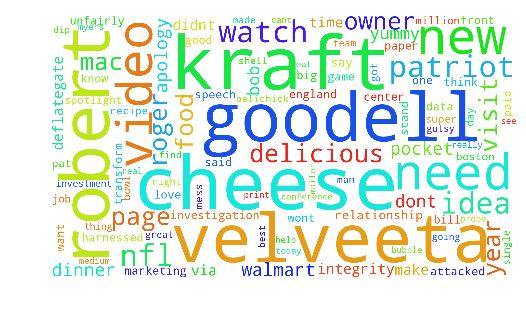

In [45]:
# Read the whole text.
text = '-'.join(data.text.values.tolist())
wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=100).generate(text)
# wordcloud.to_file("overall_cloud.png")
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Sentiment Analysis

In [38]:
def sentiment(data):
    analysis = TextBlob(data)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [40]:
data['sentiment'] = data.text.apply(sentiment)
data.sentiment.value_counts()

neutral     3102
positive    2575
negative    1259
Name: sentiment, dtype: int64

##### Positive Sentiments Word Cloud

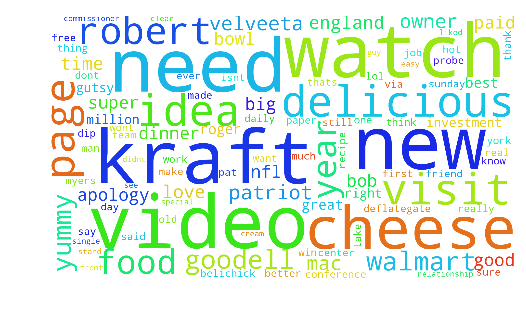

In [46]:
data_pos = data[data.sentiment=='positive']
text = '-'.join(data_pos.text.values.tolist())
wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=100).generate(text)
# wordcloud.to_file("pos_cloud.png")

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


##### Negative Sentiments Word Cloud 

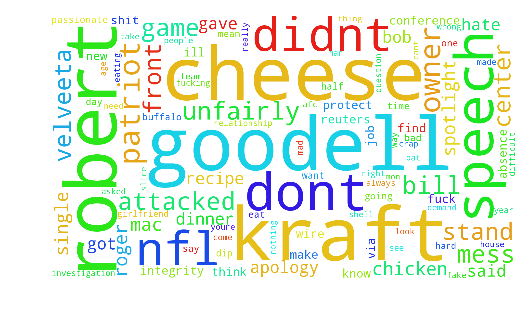

In [47]:
data_neg = data[data.sentiment=='negative']
text = '-'.join(data_neg.text.values.tolist())
wordcloud = WordCloud(width=1900, height=1080, background_color="white", max_font_size=300, max_words=100).generate(text)
# wordcloud.to_file("neg_cloud.png")

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
